# Overview

- [I. Linear Regression](#1)
    - [1.1 Model](#1.1)
    - [1.2 Least Square Method](#1.2)
    - [1.3 Test Your Model3](#1.3)
- [Gradient with Linear Regression](#2)
    - [2.1 Gradient Formula](#2.1)
    - [2.2 Implement](#2.2)
    - [2.3 Apply Model](#2.3)
- [You Should Know?](#3)

In [1]:
import numpy as np
import pandas as pd
import warnings

from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')
np.random.seed(365)

<a name='1' ></a>
# I. Linear Regression
<a name='1.1' ></a>
## 1.1 Model

In Linear Regression model prediction, we want to find a linear function to approximate for exact value

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n \approx y
$$

- $\hat{y}$ is the predicted value 
- $y$ is the exact value
- $n$ is the number of features
- $x_i$ is the $i^{th}$ feature value 
- $\theta_j$ is the $j^{th}$ model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1$ , $\theta_2$,..., $\theta_n$).

If we consider $\theta$ and $x$ as vector, we have a new fomular for $(1)$:

$$\hat{y} = h_{\theta}(x) = \theta^T x $$

- $\theta = \begin{bmatrix} \theta_0\\ \theta_1\\ \vdots\\ \theta_n \end{bmatrix}$ is the model’s parameter vector

- $x = \begin{bmatrix} x_0\\ x_1\\ \vdots\\ x_n \end{bmatrix}$ is the feature vector, with $x_0 = 1$

- $h_{\theta}$ is the hypothesis function, using the model parameters $\theta$.


*An example about linear regression, $y = \theta_0 + \theta_1 x_1$*
<img title="Linear Regression in 2-dimensions" width="500" alt="Linear Regression in 2-dimensions" src="images/linear_regression.png">
<center> Image 1. $y = \theta_0 + \theta_1 x_1$ </center>


That’s the Linear Regression model, so now how do we train it? Well, recall that training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data. We saw that the most common performance measure of a regression model is the Root Mean Square Error (RMSE). Therefore, to train a Linear Regression model, you need to find the value of θ that minimizes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) Linear Regression than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root).

The $MSE$ of a Linear Regression hypothesis $h_{\theta}$ on a training set $X$ is calculated using

$$MSE(X, h_{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{m} \sum_{i=1}^{m} (\theta^T x^{(i)} - y^{(i)})^2$$

- $m$ is the number of training examples in dataset
- $x^{(i)}$ is i-th traing example in dataset
- $y^{(i)}$ is actual value corresponding to $x^{(i)}$
- $\hat{y}^{(i)}$ is predicted value corresponding to $x^{(i)}$


<img title="MSE" width="500" alt="MSE" src="images/mse_regression.png">
<center>Image 2. $MSE$ </center>

<a name='1.2' ></a>
## 1.2 Least Square Method

Another formula of $MSE$ in matrix and vector form is

$$J(\theta) = MSE(\theta) = \frac{1}{m} (X\theta - y)^2 = \frac{1}{m} (X\theta - y)^T(X\theta - y)$$

We want to minimize loss function $J(\theta)$ and there is a easy way that deriatives it

$$\nabla J(\theta) = X^TX\theta - X^Ty$$


**Normal Equation**

$$\nabla J(\theta) = 0 \\ \Leftrightarrow \theta = (X^TX)^{-1}X^Ty$$

**QR Decomposition** 

Any real square matrix $X$ may be decomposed as

$$X = QR$$

- $Q$ is an orthogonal matrix ($Q^T=Q^{-1}$)
- $R$ is an upper triangular matrix 

\begin{align}
&\Rightarrow X \theta &= y \\
&\Leftrightarrow QR \theta &= y \\
&\Leftrightarrow Q^TQR \theta &= Q^Ty \\
&\Leftrightarrow R \theta &= Q^Ty \\
%&\Leftrightarrow \theta &= R^{-1}Q^Ty \\
\end{align}


Beside, $\theta$ is also found from another [least square methods](https://en.wikipedia.org/wiki/Least_squares) that is [SVD](https://relate.cs.illinois.edu/course/cs357-f17/f/lectures/upload/sec-svd.pdf)

In [2]:
def least_square(X, y, method="qr"):
    """
    Arguments:
        X: given matrixvfrom dataset
        y: vector actual value
        method: 'qr' to solve to QR, else to sovle normal equation
    Return:
        theta: vector theta
    """
    if method == 'qr':
        q, r = np.linalg.qr(X) # Function in package
        y_hat = np.dot(q.T, y)
        theta = np.linalg.solve(r, y_hat)
    else:
        y_hat = np.dot(X.T, y)
        X_hat = np.dot(X.T, X)
        theta = np.linalg.solve(X_hat, y_hat)
        
    return theta

<a name='1.3' ></a>
## 1.3 Test your model

In [3]:
# Generate X, y
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

X_train = np.c_[np.ones((m, 1)), X]     # add x0 = 1 to each instance

# Print information of data
nrow, nfeature = X_train.shape[0], X_train.shape[1]
print(f'X has {nrow} training examples and {nfeature} features')
print(f'y has {len(y)} elements corresponding to {nrow} training examples of X')

X has 100 training examples and 2 features
y has 100 elements corresponding to 100 training examples of X


Text(0.5, 1.0, 'Visualize actual value')

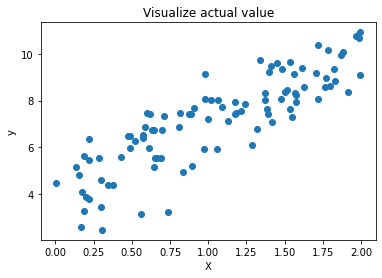

In [4]:
# Visualization 

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Visualize actual value')

### Help Function for Visualization

In [5]:
# Visualization 
def visualize(X, y, pred, title=''):
    '''
        Args:
            X: value 
            y: actual value 
            pred: predicted value 
    '''
    plt.scatter(X, y, label='Actual Value')
    plt.plot(X, pred, color='r', label='Predicted Value')
    plt.xlabel('X', size=12)
    plt.ylabel('y', size=12)
    plt.title(title, size=15)
    plt.legend()
    plt.grid()

### Your Model

Theta vector: [4.03120421 3.00023319]


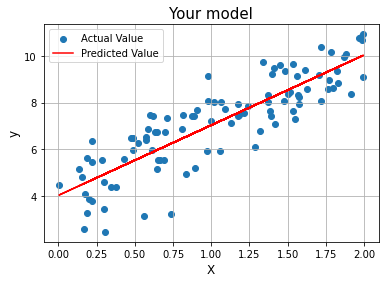

In [6]:
# Use your model that you build
theta = np.squeeze(least_square(X_train, y))
print(f'Theta vector: {theta}')
 
# y_hat = theta_0 + theta_1 * X
pred = theta[0] + theta[1] * X
visualize(X, y, pred, 'Your model')

### Sklearn Model

Theta vector: [4.03120421 3.00023319]


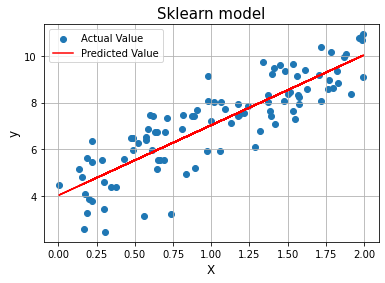

In [7]:
# Use model from sklearn libary
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y)

theta = np.squeeze(model.coef_)
print(f'Theta vector: {theta}')
 
# y_hat = theta_0 + theta_1 * X
pred = theta[0] + theta[1] * X
visualize(X, y, pred, 'Sklearn model')

In conclusion, `our model` and model from `sklearn` library return same result.

<a name='2' ></a>
# 2. Gradient Descent

Above part, we found a linear function to approximate a given data through inverse matrix. However, if our size of dataset is a few milion (bilion or more) rows and features instead of a few hundered, calculating inverse matrix waste a lot of time and memory. *Gradient Descent* is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regards to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum! 

Concretely, you start by filling $\theta$ with random values (this is called random initialization), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the $MSE$), until the algorithm converges to a minimum

<img title="Gradient Descent" width="500" alt="Gradient Descent" src="images/gradient_descent.png">
<center>Image 3. $Gradient Descent$ </center>

An important parameter in Gradient Descent is the size of the steps, determined by
the *learning rate* hyperparameter. If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time

<img title="Gradient Descent" width="500" alt="Gradient Descent" src="images/small_learning_rate.png">
<center>Image 4. Learning rate too small </center>

On the other hand, if the learning rate is too high, you might jump across the valley
and end up on the other side, possibly even higher up than you were before. This
might make the algorithm diverge, with larger and larger values, failing to find a good
solution

<img title="Gradient Descent" width="500" alt="Gradient Descent" src="images/large_learning_rate.png">
<center>Image 4. Learning rate too large </center>

<a name='2.1' ></a>
## 2.1 Gradient Formula 

*Gradient Descent Step:*

$$\theta^{next} = \theta - \eta \nabla_{\theta}J(\theta) $$

subject to

- $\theta$ is current value of vector parameters
- $\theta^{next}$ is next value of vector parameters
- $\nabla_{\theta}J(\theta)$ is *gradient* of cost function $J$ to $\theta$
- $\eta$ is *learning rate* that we choose to control how big a single update will be

Recall:

$$\nabla_{\theta } J(\theta) = 
\begin{bmatrix}
\frac{\partial J}{\partial \theta_0} \\ 
\frac{\partial J}{\partial \theta_1} \\
\frac{\partial J}{\partial \theta_2} \\
\vdots \\
\frac{\partial J}{\partial \theta_n} \\ 
\end{bmatrix}
$$

From formular $(4)$

\begin{align*}
\frac{\partial J}{\partial \theta_j} &= \frac{\partial}{\partial \theta_j} \left( \frac{1}{m} (X\theta - y)^2 \right) \\
&= \frac{2}{m} \sum_{i=1}^{m} (\theta^T x^{(i)} - y^{(i)})x_j^{(i)}
\end{align*}

Therefore

$$\nabla_{\theta}J(\theta) = \frac{2}{m} X^T(X\theta - y)$$

<a name='2.2' ></a>
## 2.2 Implement

- Cost function $J(\theta)$
- Gradient descent through each step

In [8]:
def cost_function(X, y, theta):
    '''
        Args:
            X: a matrix with dimension (m, n)
            y: a vector with dimension (m, 1)
            theta: a vector with dimension (n, 1)  
        Return:
            J: a float value, MSE - mean square error 
    '''
    
    # Calculate loss
    m = len(X)
    J = 1/m * np.dot((np.dot(X, theta) - y).T, np.dot(X, theta) - y)
    
    # Reduce dimension if not need
    # Example: [[1.234]] -> 1.234
    return np.squeeze(J)

In [9]:
def gradient_descent(X, y, theta, eta, num_iters=300, verbose=False, visualize=False):
    '''
        Args:
            X: a matrix with dimension (m, n+1)
            y: a vector with dimension (m, 1)
            theta: a vector with dimension (n+1, 1) 
            eta: learning rate 
            num_iters: the number of iterations use to update weight
            verbose: True if you want to print information when iterating
            visualize: True if you want to see the change of theta through each iteration
        Returns:
            J: the last cost 
            theta: last vector weight
    '''
    # get the number of training examples 
    m = len(X)
    
    # loop to update weight
    for i in range(num_iters):
        J = cost_function(X, y, theta)
        gradient = 2/m * np.dot(X.T, np.dot(X, theta) - y)
        theta = theta - eta * 2/m * gradient
        
        # print information
        if verbose and i % 100 == 0:
            print(f"The cost at loop {i} is {J:.8f}.")
        
        # Visualization for only 2-D
        if visualize and i % 25 == 0:   
            weight = np.squeeze(theta)
            pred = np.dot(X, theta)
            plt.plot(X[:, 1], pred, color='g')

    return J, np.squeeze(theta)

<a name='2.3' ></a>
## 2.3 Apply Model

- **Note:** When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

The cost at loop 0 is 44.57859952.
The cost at loop 100 is 2.34880370.
The cost at loop 200 is 1.22354678.
The cost at loop 300 is 1.15959431.
The cost at loop 400 is 1.12993791.
The cost at loop 500 is 1.10683961.
The cost at loop 600 is 1.08843780.
The cost at loop 700 is 1.07376677.
The cost at loop 800 is 1.06206987.
The cost at loop 900 is 1.05274417.
The cost at loop 1000 is 1.04530899.
The cost at loop 1100 is 1.03938107.
The cost at loop 1200 is 1.03465487.
The cost at loop 1300 is 1.03088676.
The cost at loop 1400 is 1.02788253.
The cost at loop 1500 is 1.02548731.
The cost at loop 1600 is 1.02357766.
The cost at loop 1700 is 1.02205513.
The cost at loop 1800 is 1.02084125.
The cost at loop 1900 is 1.01987345.


Theta: [3.91809221 3.09323809]


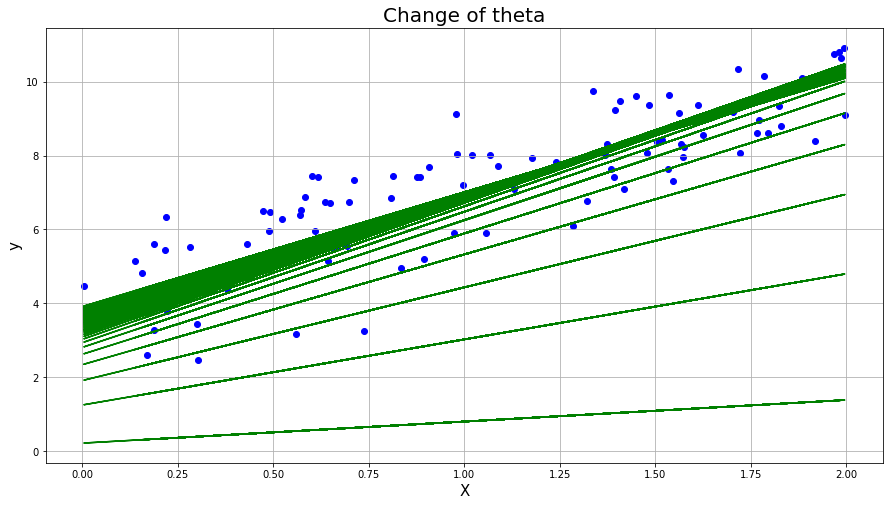

In [13]:
np.random.seed(365)

# Initialize 
n = X.shape[1]
initial_theta = np.random.randn(n+1, 1)
eta = 0.2
num_iters = 2000

# Set firgure for visualization
plt.figure(figsize=(15, 8))
#X_train[:, 1:] = X, after remove X0 = 1
plt.scatter(X_train[:, 1:], y, color='b') 
plt.xlabel('X', size=15)
plt.ylabel('y', size=15)
plt.grid()
plt.title('Change of theta', size=20)

# Calculate
J, theta = gradient_descent(X_train, y, initial_theta, eta, num_iters, verbose=True, visualize=True)
print(f'\n\nTheta: {theta}')

<a name='3' ></a>
# You Should Know?

- Gradient Descent is used in our notebook that is Batch Gradient Descent. Besides, there are some of others such as Stochastic Gradient Descent, Mini-batch Gradient Descent 